In [1]:
import sys
from dotenv import load_dotenv, dotenv_values
load_dotenv("../cv19.env")
sys.path.append(dotenv_values("../cv19.env")["CV19ROOT"])

In [2]:
import pandas as pd

In [3]:
from cv19.simulation import simulation

In [4]:
# Initialize the simulation object
config_file = "../config_files/main.json"
sim = simulation(config_file, verbose=False)

In [5]:
# Run the simulation
sim.run()

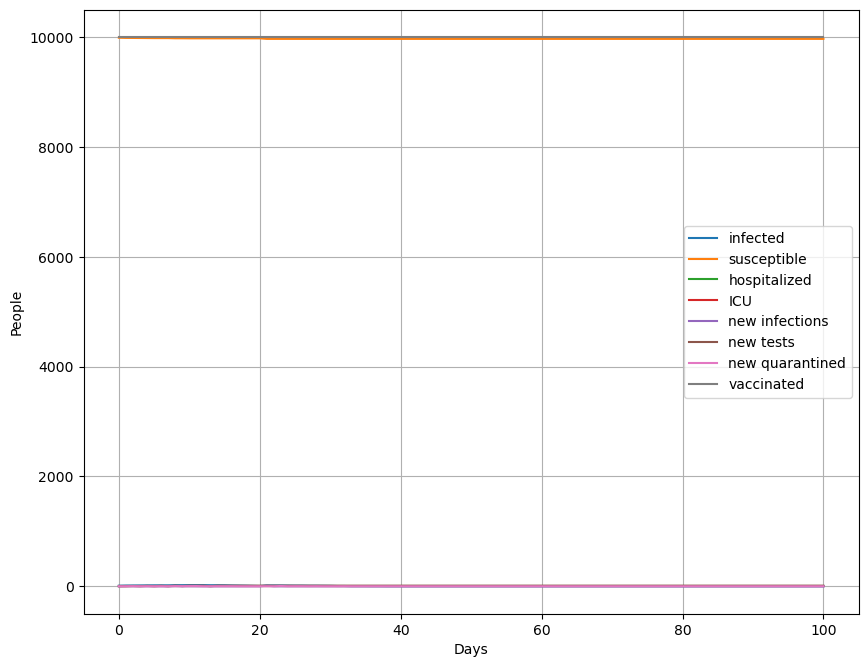

In [6]:
# Determine plot parameters and show the plot
plot_kws = {"plot_infected":True, "plot_recovered":False, "plot_dead":False, "plot_susceptible":True,
            "plot_new_infected":True, "plot_quarantined":False, "plot_tested":False, 
            "plot_lockdown":False, "plot_masks":False, "plot_testing":False, "plot_students":False, 
            "plot_vaccinated":True,
            'log':False}        
sim.plot(**plot_kws)

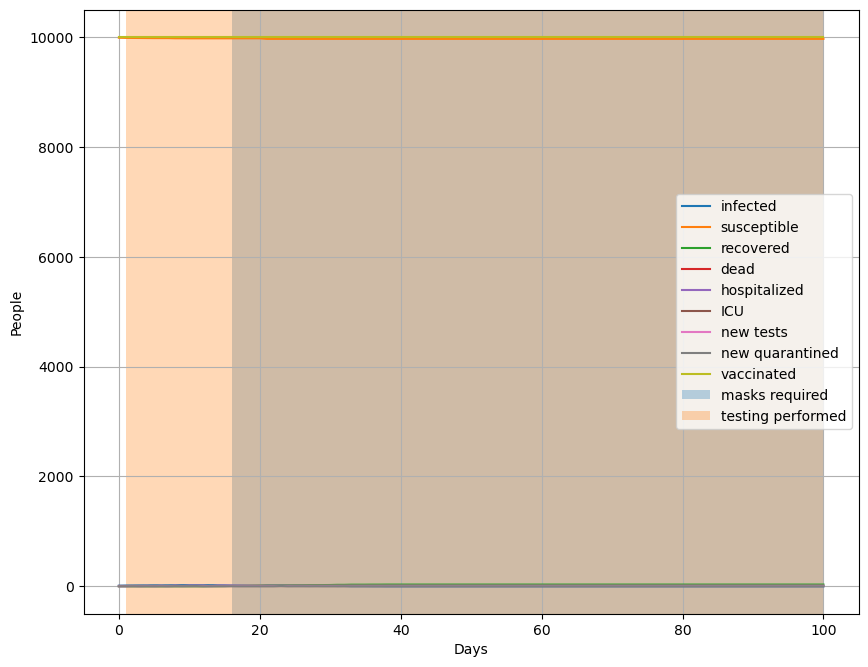

In [7]:
# Determine plot parameters and show the plot
plot_kws = {"plot_infected":True, "plot_recovered":True, "plot_dead":True, "plot_susceptible":True,
            "plot_new_infected":False, "plot_quarantined":False, "plot_tested":False, 
            "plot_lockdown":False, "plot_masks":True, "plot_testing":True, "plot_students":False,
            "plot_vaccinated":True,
            'log':False}        
sim.plot(**plot_kws)

In [8]:
# Example of how to access the raw data and convert to a pandas DataFrame.
raw_data = sim.get_arrays()
df = pd.DataFrame(raw_data)
df.index.rename('day', inplace=True)
df.head()

,infected,new_infected,recovered,susceptible,dead,quarantined,inf_students,total_tested,new_tested,hospitalized,ICU,testing_enforced,masks_enforced,lockdown_enforced,time_elapsed,vaccinated
day,,,,,,,,,,,,,,,,
0,10,0,0,9990,0,0,2,0,0,0,0,False,True,False,0.144443,10000
1,13,3,0,9987,0,0,2,0,0,0,0,True,False,False,0.284774,10000
2,14,1,0,9986,0,2,2,5,5,0,0,True,False,False,0.405542,10000
3,15,1,0,9985,0,2,2,6,1,0,0,True,False,False,0.539804,10000
4,16,1,0,9984,0,3,2,13,7,0,0,True,False,False,0.696676,10000
